In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [4]:
df1=pd.read_csv(r'C:\Users\anike\OneDrive\Documents\DS\Projects\Regression\House_Price_Prediction\bengaluru_house_prices.csv')

In [5]:
df1.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.shape

(13320, 9)

In [7]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df2=df1.drop(['area_type','availability','society'],axis='columns')

In [9]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
##Dropping null values

In [12]:
df3=df2.dropna()

In [13]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
df3.groupby('size')['size'].count()

size
1 BHK          530
1 Bedroom      105
1 RK            13
10 Bedroom       3
11 BHK           1
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
2 BHK         5152
2 Bedroom      328
27 BHK           1
3 BHK         4128
3 Bedroom      527
4 BHK          489
4 Bedroom      749
43 Bedroom       1
5 BHK           36
5 Bedroom      263
6 BHK           23
6 Bedroom      169
7 BHK           16
7 Bedroom       69
8 BHK            3
8 Bedroom       65
9 BHK            5
9 Bedroom       29
Name: size, dtype: int64

In [15]:
##Adding new column to hold number of bedrooms

In [16]:
df3['bhk']=df3['size'].apply(lambda x :int(x.split(' ')[0]))

C:\Users\anike\AppData\Local\Temp\ipykernel_1156\1972506655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x :int(x.split(' ')[0]))


In [17]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [18]:
df3['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [19]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df3[~df3['total_sqft'].apply(isFloat)].head()

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [22]:
def convert_sqft_to_num(x):
    numbers=x.split('-')
    if(len(numbers)==2):
        return ((float(numbers[0])+float(numbers[1]))/2)
    try:
        return float(x)
    except:
        return None

In [23]:
print(convert_sqft_to_num('111'))

111.0


In [24]:
df4=df3.copy()

In [25]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [26]:
df4[~df4['total_sqft'].apply(isFloat)].head()

,location,size,total_sqft,bath,balcony,price,bhk


In [27]:
df5=df4.copy()

In [28]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [29]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [30]:
len(df5.location.unique())

1265

In [31]:
df5.location=df5['location'].apply(lambda x:x.strip())

In [32]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [33]:
print (location_stats)

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64


In [34]:
len(location_stats[location_stats<10])

1007

In [35]:
location_less_than_10=location_stats[location_stats<10]

In [36]:
location_less_than_10

location
Chandra Layout          9
Nehru Nagar             9
Kamakshipalya           9
B Narayanapura          9
Nagadevanahalli         9
                       ..
Kanakapura  Rod         1
Kanakapura Main Road    1
Kanakapura Road         1
Kanakapura Road,        1
whitefiled              1
Name: location, Length: 1007, dtype: int64

In [37]:
len(df5.location.unique())

1254

In [38]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x)

In [39]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


df5.location.unique()

In [40]:
len(df5.location.unique())

248

In [41]:
##Check if size is less when seen with respect to number of rooms

In [42]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [43]:
df5.shape

(12710, 8)

In [44]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [45]:
df6.shape

(12055, 8)

In [46]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [47]:
def remove_outliers_price_per_sqft(df):
    data_out=pd.DataFrame()
    for key,subdf in df6.groupby('location'):
        df_mean=np.mean(subdf.price_per_sqft)
        df_sd=np.std(subdf.price_per_sqft)
        df_reduced=subdf[(subdf.price_per_sqft<(df_mean+df_sd)) & (subdf.price_per_sqft>(df_mean-df_sd))]
        data_out=pd.concat([data_out,df_reduced],ignore_index=True)
    return data_out

df7=remove_outliers_price_per_sqft(df6)
df7.shape

(9829, 8)

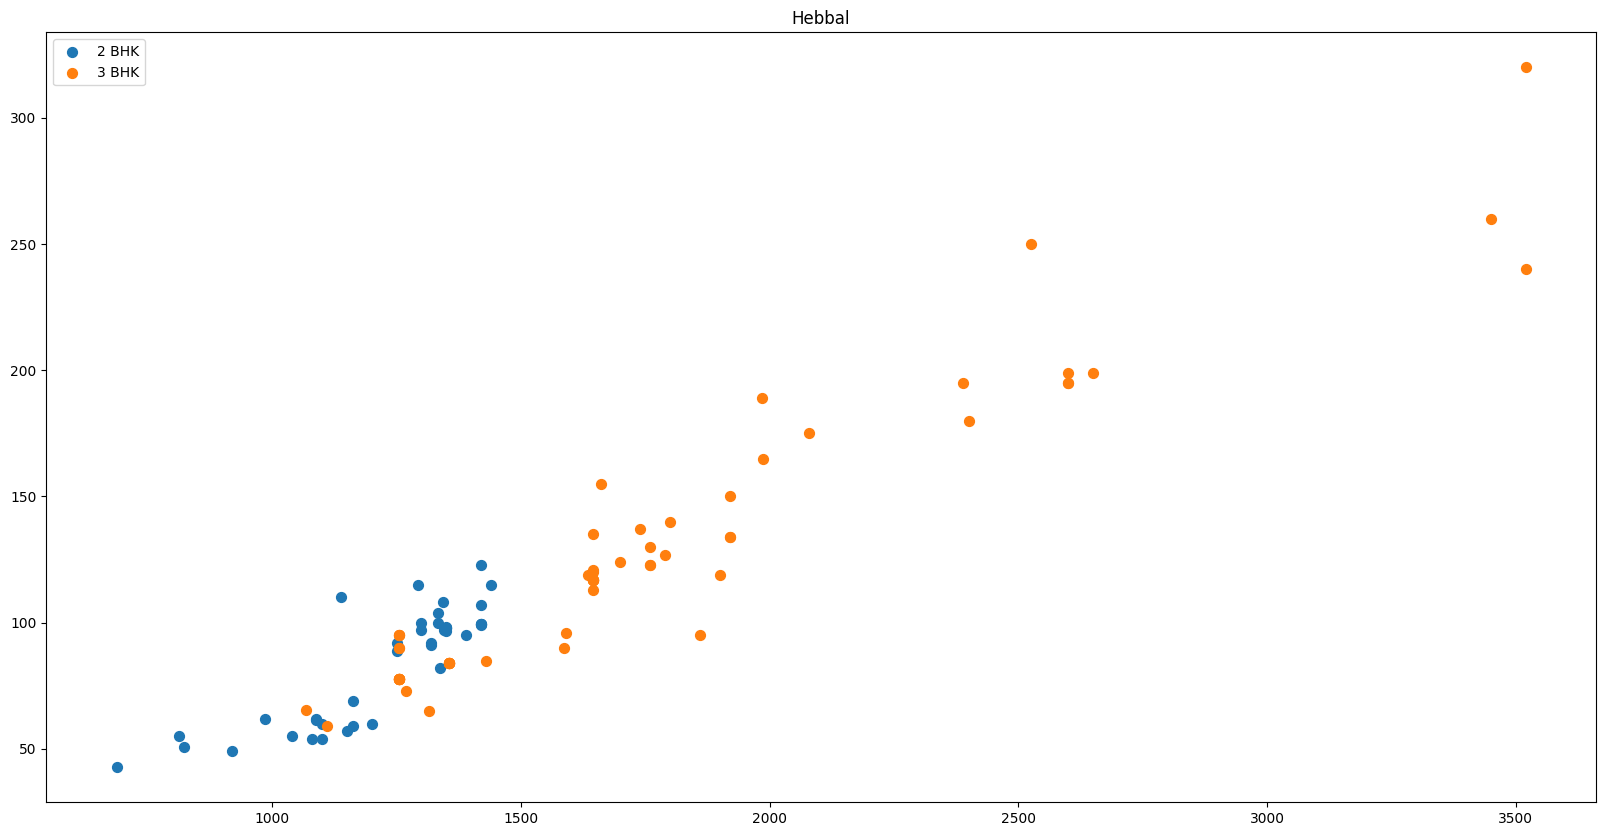

In [48]:
def scatter_plot(df,location):
    bhk2=df[(df.bhk==2) & (df.location==location)]
    bhk3=df[(df.bhk==3) & (df.location==location)]
    
    plt.scatter(bhk2.total_sqft, bhk2.price, label='2 BHK', s=50 )
    plt.scatter(bhk3.total_sqft, bhk3.price, label='3 BHK', s=50 )
    plt.xlabel='Total Sqft'
    plt.ylabel='Price'
    plt.title(location)
    plt.legend()
    
scatter_plot(df7,'Hebbal')

In [49]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df7.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8=remove_bhk_outliers(df7)
df8.shape

(7063, 8)

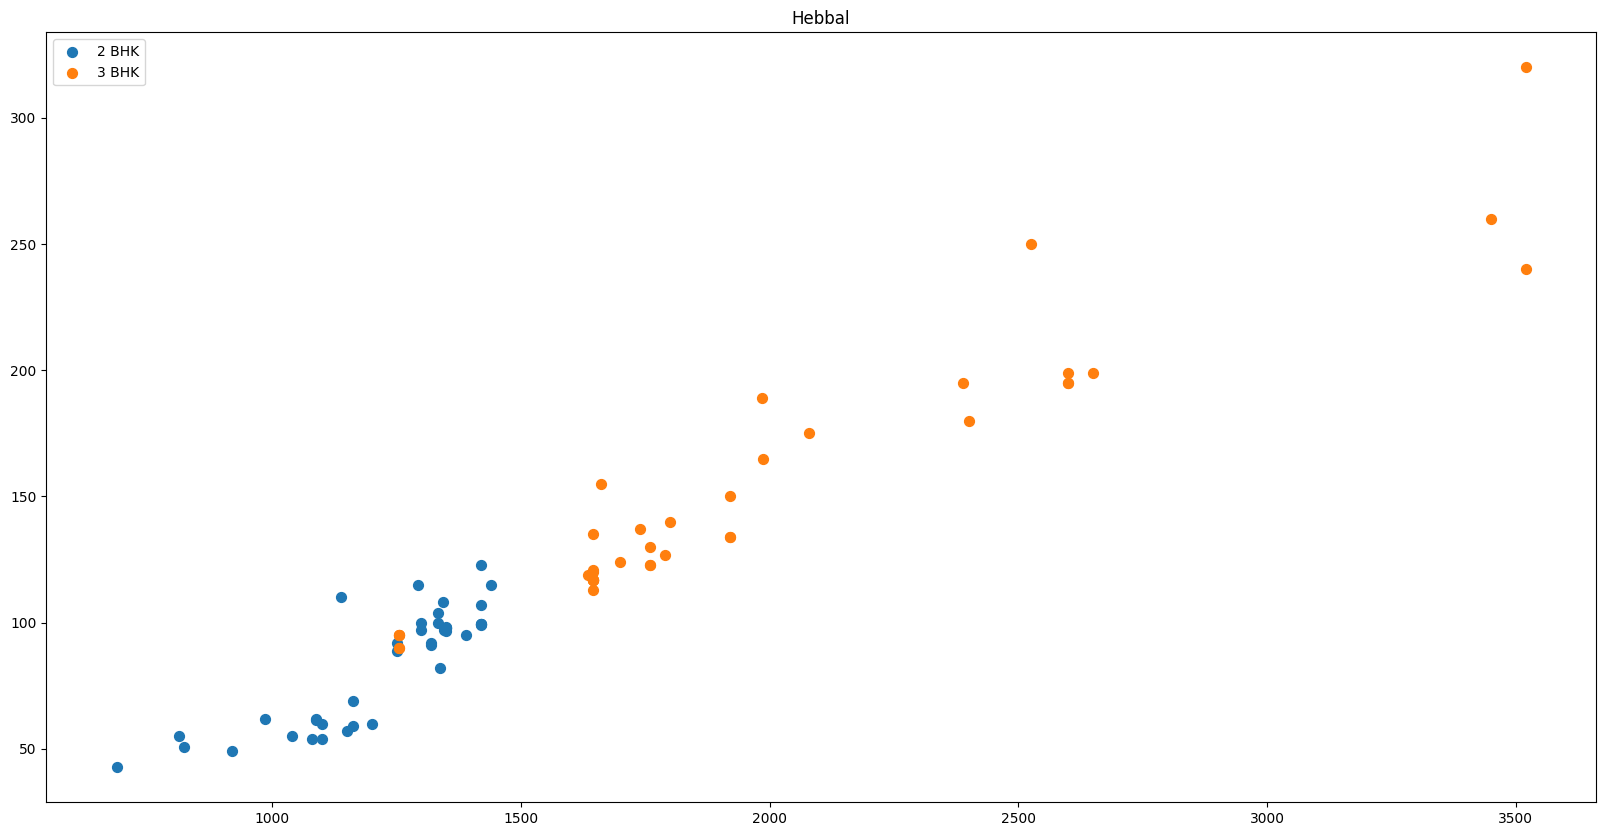

In [50]:
scatter_plot(df8,'Hebbal')

<Axes: xlabel='price_per_sqft', ylabel='Count'>

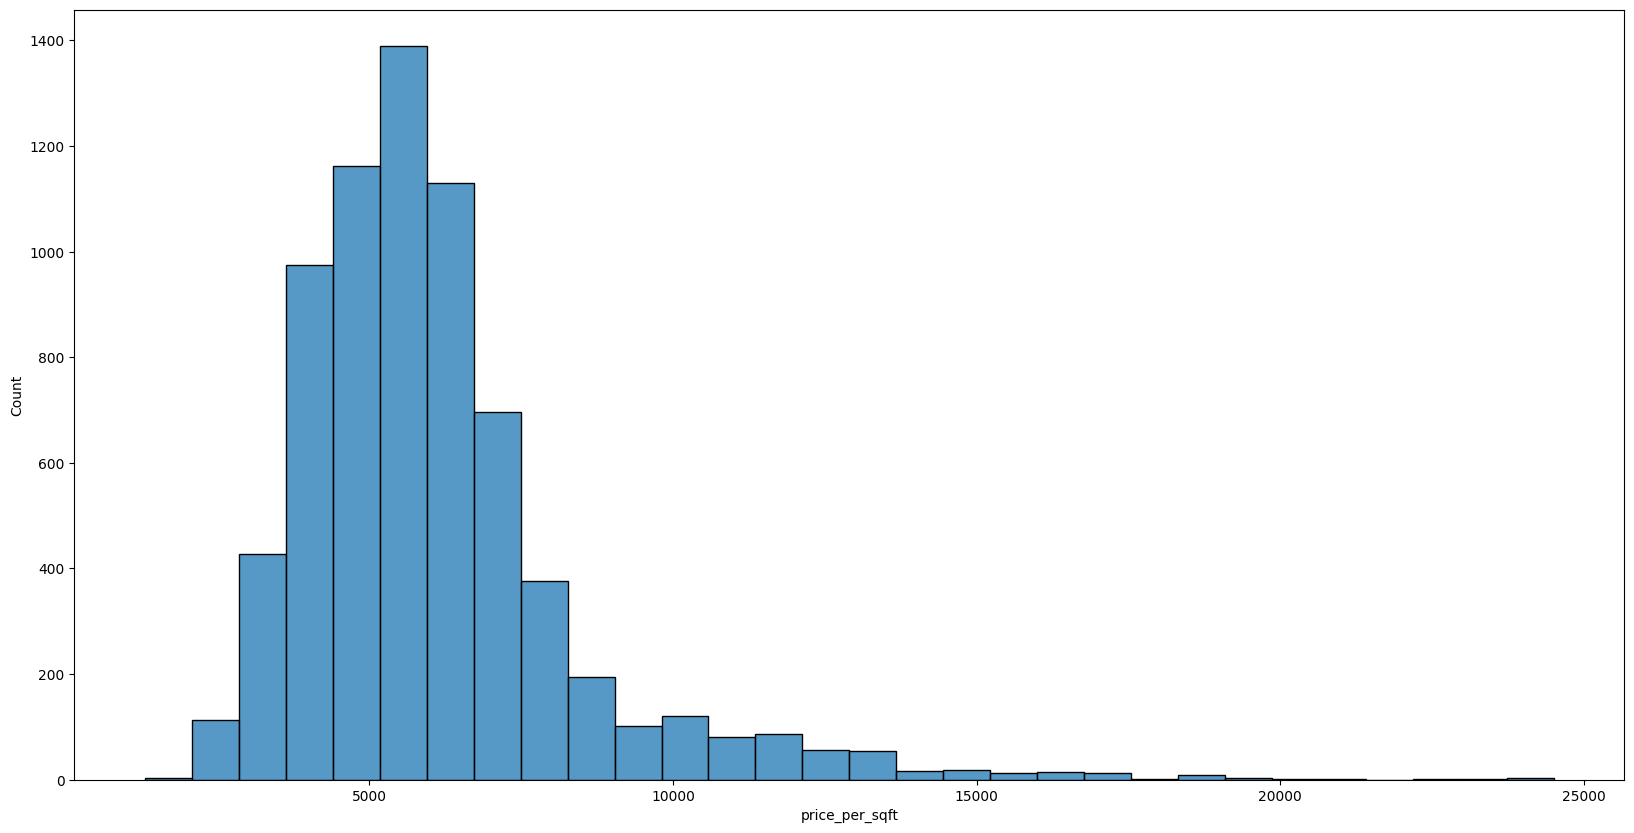

In [51]:
sns.histplot(data=df8,x=df8.price_per_sqft,bins=30)

In [52]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

In [53]:
df8[df8.bath>10]
df8.shape

(7063, 8)

<Axes: xlabel='bath', ylabel='Count'>

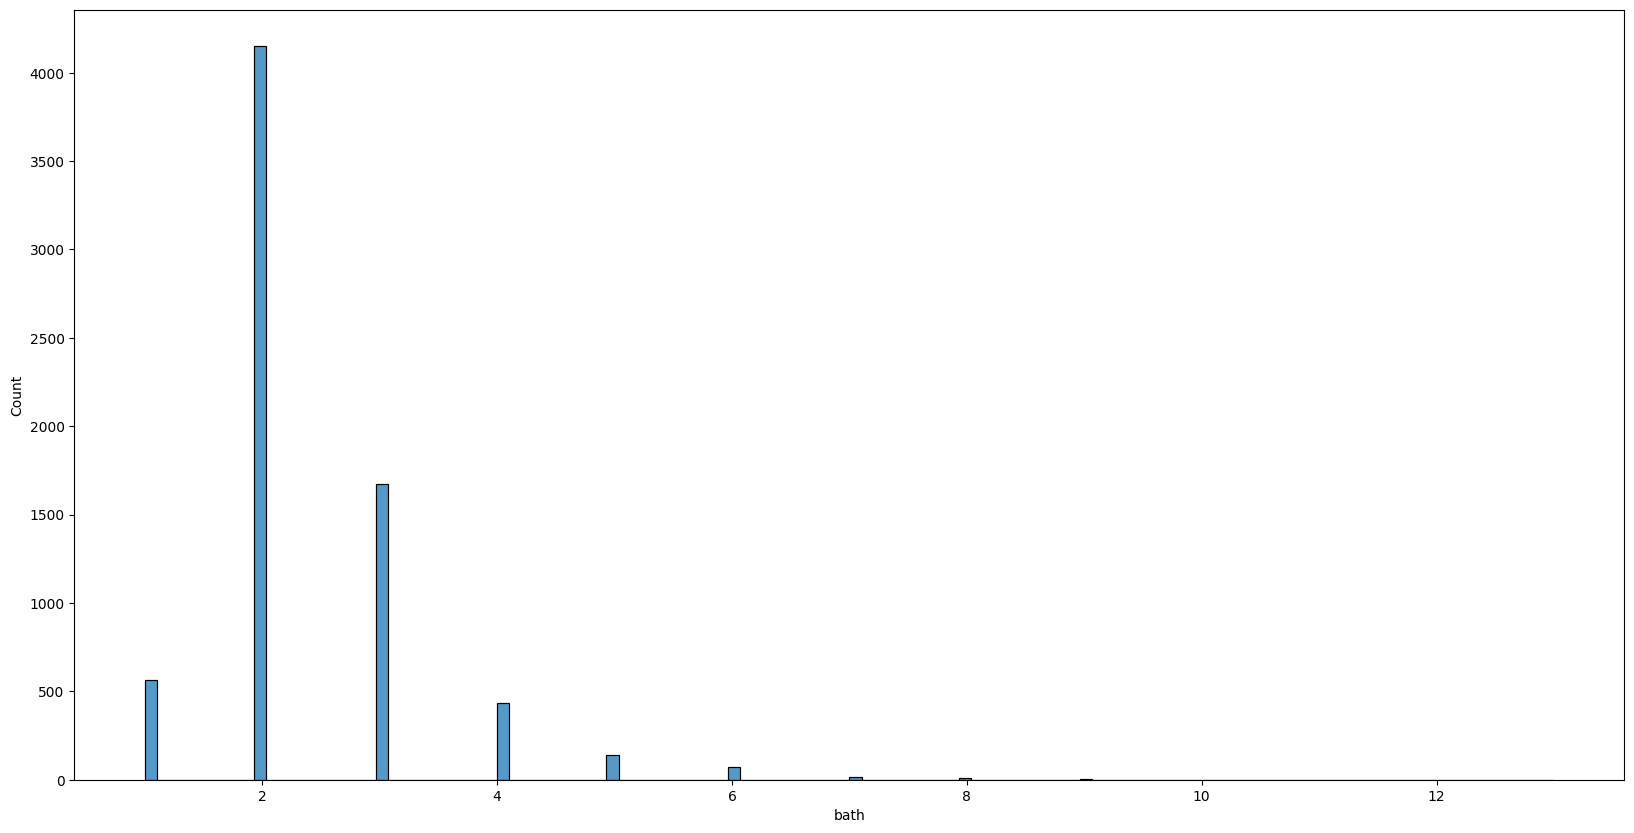

In [54]:
sns.histplot(data=df8,x=df8.bath)

In [55]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1555,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6511,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8137,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [56]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(6996, 8)

In [57]:
df10=df9.drop(['price_per_sqft','size'],axis='columns')

In [58]:
df10.location.unique

<bound method Series.unique of 0       1st Block Jayanagar
1       1st Block Jayanagar
2       1st Block Jayanagar
3       1st Block Jayanagar
4       1st Block Jayanagar
               ...         
9819                  other
9821                  other
9822                  other
9825                  other
9826                  other
Name: location, Length: 6996, dtype: object>

In [59]:
dummies=pd.get_dummies(df10.location, dtype=int)
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [61]:
df11

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9819,other,1155.0,2.0,1.0,64.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9821,other,1200.0,2.0,3.0,70.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9822,other,1800.0,1.0,1.0,200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9825,other,1353.0,2.0,2.0,110.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df12=df11.drop('location',axis='columns')

In [63]:
df12.shape

(6996, 252)

In [64]:
X= df12.drop('price', axis='columns')

In [65]:
X.head(5)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
Y=df12.price

In [67]:
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [70]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7596986437910791

In [71]:
#Use K Fold cross validation to measure accuracy of our LinearRegression model

In [73]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.83943116, 0.78132131, 0.77325802, 0.87007045, 0.84226224])

In [ ]:
#Testing the model for few properties

In [74]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [75]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


C:\Users\anike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.82776727886032

In [76]:
predict_price('1st Phase JP Nagar',1000, 3, 3)


C:\Users\anike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.55567576701776

In [77]:
predict_price('Indira Nagar',1000, 2, 2)


C:\Users\anike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


158.35285042184825

In [78]:
predict_price('Indira Nagar',1000, 3, 3)


C:\Users\anike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


155.08075891000573

In [79]:
import pickle

In [83]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [81]:
#Export location and column information to a file that will be useful later on in our prediction application

In [82]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))